# 📊 Exploratory Data Analysis (EDA): Data Science Job Market Overview (2024)

### **Project Overview**
This project explores the data science job market using Python, focusing on roles, locations, companies, and job benefits. The goal is to provide actionable insights for job seekers navigating the data science landscape.

> **Scope note:**  
> This notebook focuses on **exploratory analysis of the data science job market**, including roles, locations, companies, and job benefits.  
> A separate notebook continues this analysis by examining **skill demand, salary impact, and identifying optimal skills** for Data Analysts.

### 🎯 **Key Goals**
1. Explore the distribution of data science roles across industries and locations.
2. Analyze job postings to understand hiring trends and employer demand.
3. Examine job benefits and market characteristics for US Data Analyst roles.

### 🗂 **Project Deliverables**
- Jupyter Notebook showcasing all analysis steps and visualizations.
- Summary of insights and findings.
- Shared via GitHub and LinkedIn.

### ❓ **Key Questions Addressed**
1. What are the most demanded roles in the data science job market?
2. Which countries and locations show the highest concentration of data jobs?
3. Which companies are hiring the most data professionals?
4. What benefits are commonly offered in data science roles?
5. What does the US Data Analyst job market look like in terms of location, companies, and benefits?

> *Skill-level analysis and identification of “optimal skills” (high demand and high pay) are explored in a follow-up notebook.*

---

## 1️⃣ **Setup: Import Libraries and Data**

We will use the **full job postings dataset (2023–2024)** from [datanerd.tech](https://datanerd.tech) to analyze US Data Analyst skills.  

> **Dataset Source:**  
> - Originally part of the Python Data Analyst course, extended with full dataset covering 2023 through the latest update.  
> - File: `job_postings_flat.csv` (local CSV, not pushed to GitHub due to size >100MB).  
> - Updated twice a year to reflect the most recent job trends.

We filter to **2024** to focus on the most recent complete year, ensuring our analysis of skill demand and salary is current and relevant.

In [13]:
# Import required libraries
import ast
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Configure data source - Base project directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to CSV using relative structure
CSV_PATH = os.path.join(BASE_DIR, 'data', 'Job_Postings_2023-2024.csv')

# Load data automatically
if os.path.exists(CSV_PATH):
    print(f"Loading local CSV from '{CSV_PATH}'...")
    df = pd.read_csv(CSV_PATH)
else:
    print("Local CSV not found. Loading dataset from Hugging Face...")
    dataset = load_dataset('lukebarousse/data_jobs')
    df = dataset['train'].to_pandas()

# Clean and prepare data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df[df['job_posted_date'].dt.year == 2024]

print(f"Data loaded successfully!")

Loading local CSV from '/Users/nadia_rozman/Python_for_Data_Analytics/Project/data/Job_Postings_2023-2024.csv'...
Data loaded successfully!


## 2️⃣ **General Analysis Across All Roles**

### 💼 **Job Title**

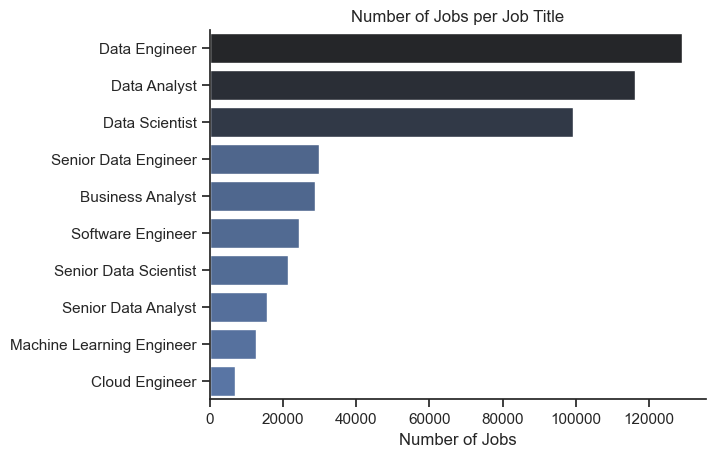

In [4]:
# Analyze job title distribution
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### 🌎 **Job Locations**

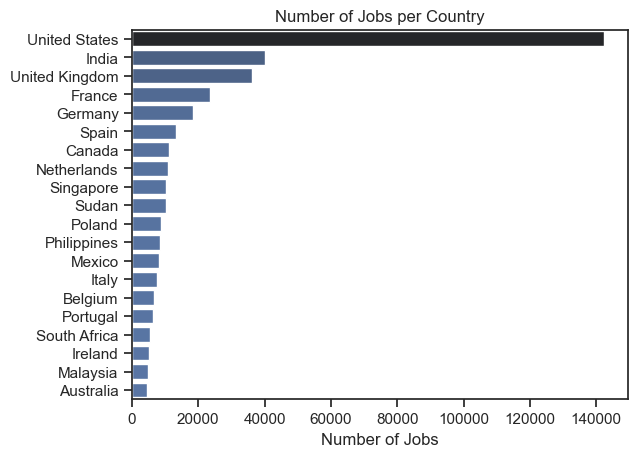

In [5]:
# Analyze job locations by country
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


### 🏢 **Top Companies**

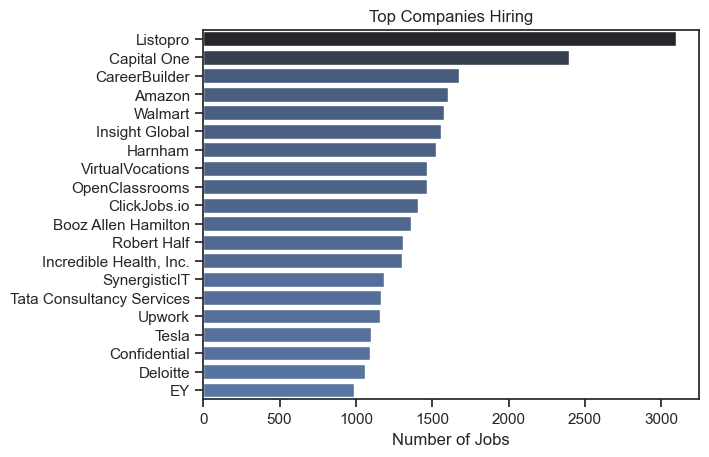

In [6]:
# Identify top hiring companies
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Top Companies Hiring')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### 🎁 **Job Benefits**

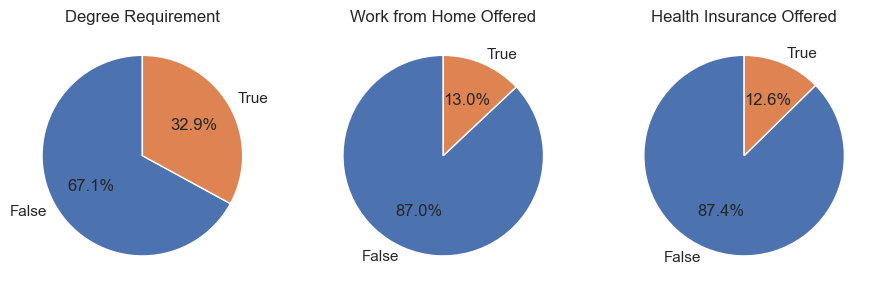

In [7]:
# Analyze job benefits distribution
dict_column = {
    'job_no_degree_mention': 'Degree Requirement',
    'job_work_from_home': 'Work from Home Offered',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

## 3️⃣ **Focused Analysis: US Data Analyst Roles**

### 🔍 **Filtering Data**

In [8]:
# Filter for US Data Analyst roles
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
787356,Data Analyst,"Summer Internship -Data Analyst Intern, Risk M...","Marlborough, MA",via Boatingrevealed.com,"Full-time, Part-time, and Internship",False,"New York, United States",2024-01-01 00:00:01,False,True,United States,NaN,NaN,NaN,BJ's Wholesale Club,[excel],{'analyst_tools': ['excel']}
787357,Data Analyst,"Summer Internship -Data Analyst Intern, Risk M...","Marlborough, MA",via Boatingrevealed.com,"Full-time, Part-time, and Internship",False,"New York, United States",2024-01-01 00:00:01,False,True,United States,NaN,NaN,NaN,BJ's Wholesale Club,[excel],{'analyst_tools': ['excel']}
787358,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",via ClimateTechList,Full-time,False,"California, United States",2024-01-01 00:00:11,True,False,United States,NaN,NaN,NaN,Tesla,"[tableau, flow]","{'analyst_tools': ['tableau'], 'other': ['flow']}"
787359,Data Analyst,"Staff Data Analyst Operations, Infrastructure ...","Fremont, CA",via ClimateTechList,Full-time,False,"California, United States",2024-01-01 00:00:11,True,False,United States,NaN,NaN,NaN,Tesla,"[tableau, flow]","{'analyst_tools': ['tableau'], 'other': ['flow']}"
787360,Data Analyst,Junior Data Analyst - Entry Level,"Waco, TX",via ZipRecruiter,Full-time and Part-time,False,"Texas, United States",2024-01-01 00:00:15,True,False,United States,NaN,NaN,NaN,Next Recruiting,NaN,NaN


### 📍 **Job Locations**

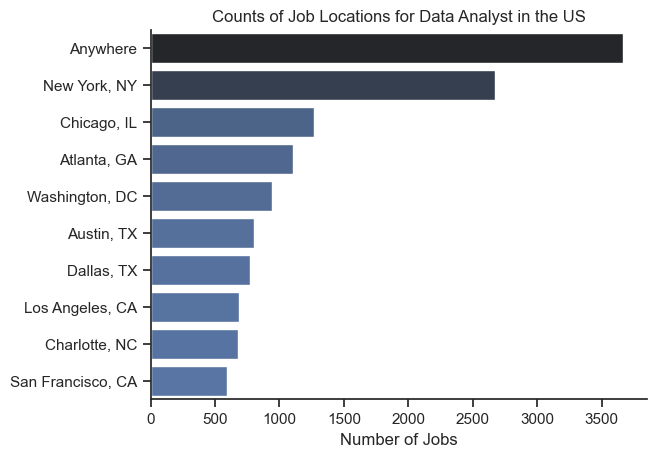

In [10]:
# Analyze top job locations for Data Analysts in US
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

### 🎁 **Job Benefits**

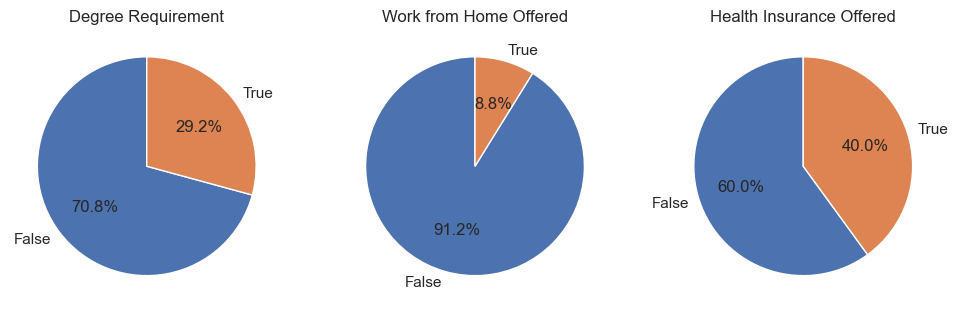

In [11]:
# Analyze job benefits for US Data Analysts
fig, ax = plt.subplots(1, 3, figsize=(12,5))
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### 🏢 **Top Hiring Companies**

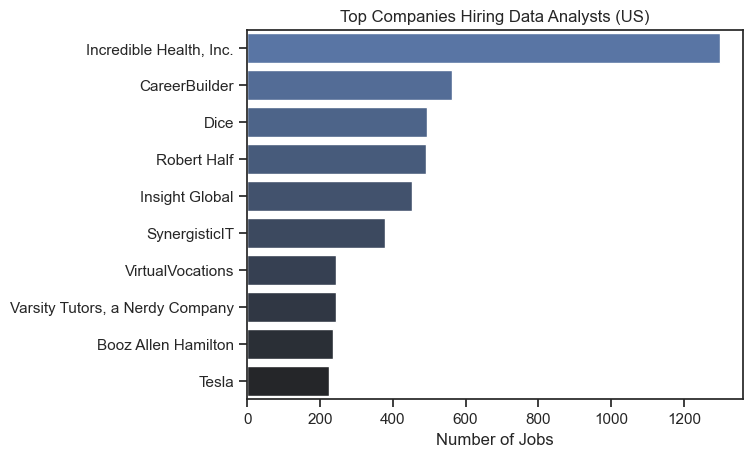

In [12]:
# Identify top companies hiring Data Analysts in US
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['company_name', 'count']

sns.barplot(data=df_plot, x='count', y='company_name', hue='company_name', palette='dark:b_r', dodge=False, legend=False)
plt.title('Top Companies Hiring Data Analysts (US)')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

## 📌 **Key Takeaways**

### 🌍 **Global Data Science Job Market**
- **Data Analyst** and **Data Engineer** roles dominate demand across the data science landscape  
- The **United States** leads global job postings by a wide margin, followed by **India** and the **United Kingdom**
- Large employers and **staffing agencies** (e.g., *Listopro*, *Capital One*) play a major role in global hiring


### 🎁 **Job Benefits Snapshot (Global)**
- **Degree requirements**: ~67% of postings do **not** explicitly require a degree, indicating growing openness to alternative credentials
- **Remote work**: Only ~13% of roles explicitly offer work-from-home options, suggesting many jobs remain on-site or hybrid
- **Health insurance**: ~13% of postings mention health insurance, likely reflecting inconsistent job descriptions rather than absence of benefits

---

### 🇺🇸 **US Data Analyst Market Insights**

#### 📍 **Location Trends**
- **Remote-first roles** (“Anywhere”) lead postings, reflecting increased workplace flexibility
- **New York, NY** and **Chicago, IL** remain the top physical hiring hubs
- Other strong markets include **Atlanta**, **Washington DC**, **Austin**, and **Dallas**

#### 🎁 **Benefits Comparison (US vs Global)**
Compared to the global average, US Data Analyst roles offer:
- **Higher health insurance coverage**: ~40% vs ~13% globally
- **More flexible degree requirements**: ~71% vs ~67% globally
- **Comparable remote options**: ~9% vs ~13% globally

#### 🏢 **Leading Employers**
- **Incredible Health, Inc.** ranks highest with 1,200+ Data Analyst postings
- **Staffing firms** (*CareerBuilder*, *Dice*, *Robert Half*) dominate the top employers
- Consulting firms (*Booz Allen Hamilton*, *SynergisticIT*) and tech companies (*Tesla*) also show strong hiring activity

---

### 💡 **Actionable Takeaways for Job Seekers**
1. **Leverage staffing agencies** to access a broader range of opportunities
2. Emphasize **technical skills and portfolios** over formal degrees
3. Target **major metro areas** or “Anywhere” roles for maximum job availability
4. Prioritize roles offering **health insurance**, as this benefit is not consistently listed